# 1. HW1: Multinomial Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [5]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

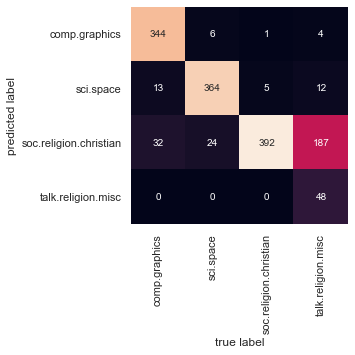

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

시간이..없어서..복붙했음니다 죄송함니다

# 2. HW2: predict wine category
## 2-1. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
wine = pd.read_csv('../Wine.csv')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


변수 명이 알아보기 힘드니까 보기 좋게 바꿔준다

In [3]:
wine.columns = ['Y'] + ['X' + str(i) for i in range(1, len(wine.columns))]
wine.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
wine.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
dtype: int64

결측치가 없는 아주 좋은 데이터!!^^

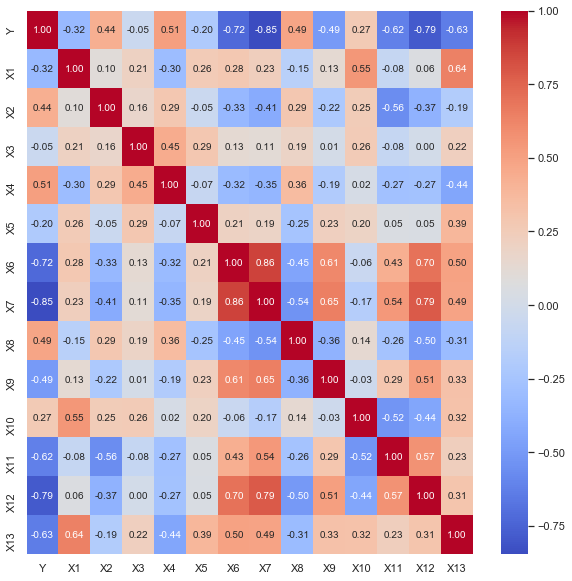

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, ax=ax, fmt='.2f', cmap='coolwarm');

변수들끼리 상관관계가 매우 높다. <br>
이런 경우 모델의 안정성을 위해 feature selection을 해주면 좋지만 귀찮으니 <br>
* PCA로 차원을 축소($\mathbf{R^{k}}$ $\text{for}$ $k=1,2,...,13$)하여 Multinomial Logistic Regression 
* 그냥 Logistic Regression
* 차수(몇 차수까지?)를 추가하여 Multinomail Logistic Regression

세 개의 방법을 비교하여 최종 모델을 정하기로 결정

# 2-2. train, test split

In [11]:
from sklearn.model_selection import train_test_split

X, y = wine.iloc[:, 1:], wine['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(141, 13) (141,)
(36, 13) (36,)


# 2-3. PCA

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

원래 PCA 하기 전에는 스케일링이 필수적임

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

lambdas = pca.explained_variance_ratio_
lambdas_sum = np.cumsum(lambdas)

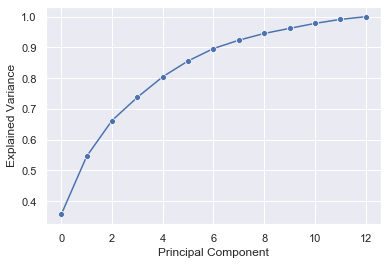

In [23]:
sns.lineplot(data = lambdas_sum, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance');

8개의 축만 사용해도 분산의 95%가 설명되니 8개를 사용하기로 했다

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV

pca_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                    ('estimator', LogisticRegressionCV(scoring='accuracy'))])
pca_pipe.fit(X_train, y_train);

In [31]:
pca_pipe.score(X_train, y_train)

0.9858156028368794

PCA만 해도 꽤나 스코어가 높다..

# 2-4. Logistic Regression

In [38]:
logistic_pipe = Pipeline([('estimator', LogisticRegressionCV(scoring='accuracy', max_iter=10000))])
logistic_pipe.fit(X_train, y_train);

`max_iter`가 기본값(100)일 때는 회귀계수가 수렴하지 않아 10000까지 늘리니까 겨우 수렴함

In [39]:
logistic_pipe.score(X_train, y_train)

1.0

오버피팅 했을 가능성이 많아 보인다ㅜㅜ <br>
원래는 차수를 높여 보려고 했지만 이미 기본 로지스틱 회귀로도 트레인 데이터에 완벽하게 피팅하니 <br>
차수를 늘려봤자 오버피팅만 될 듯해서 PCA 기반 로지스틱의 차수를 높여보기로 방법을 바꾸기로 했다

# 2-5. polynomial expansion

In [41]:
from sklearn.preprocessing import PolynomialFeatures

pca_pipe2 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                     ('poly', PolynomialFeatures(degree=2)),
                    ('estimator', LogisticRegressionCV(scoring='accuracy'))])
pca_pipe3 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                     ('poly', PolynomialFeatures(degree=3)),
                    ('estimator', LogisticRegressionCV(scoring='accuracy'))])

In [43]:
pca_pipe2.fit(X_train, y_train);
pca_pipe3.fit(X_train, y_train);

In [46]:
print(pca_pipe2.score(X_train, y_train))
print(pca_pipe3.score(X_train, y_train))

1.0
1.0


# 2-6. test set에 비교

In [49]:
print(pca_pipe.score(X_test, y_test))
print(pca_pipe2.score(X_test, y_test))
print(pca_pipe3.score(X_test, y_test))

1.0
1.0
1.0


결론: `PCA(n_components=8)`에 그냥 로지스틱 회귀 씁시다